In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [3]:
# Loading the data
raw_data = pd.read_csv('data/car_sales_example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### First conclusions:

1. We have different number of observations so there are some missing values
2. Looking at the 'Model' column we can see that there are 312 unique models. This will be very hard to implement in regression. 
   A lot information from 'Model' can be gathered when combining 'Brand'. 'Year' and 'EngineV', so dropping it shouldn't make a    big difference.

3. 'Registration'column - there are 3947 car with registration (so almost all of them). This variable won't be very useful.

### Droping columns

In [6]:
data = raw_data.drop(['Model'], axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Dealing with missing values

In [7]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

We have missing values in 'Price' (172 missing values - less than 4%) and 'EngineV' (150 missing values - about 3%). The rule of thomb is that we can remove missing values if there is not more than 5% of them.

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the Probability Distribution Functions

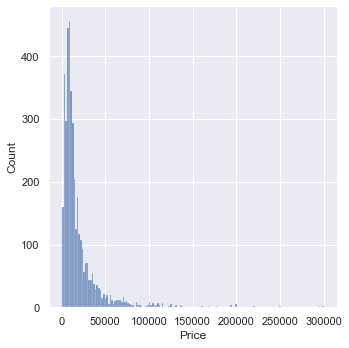

In [10]:
sns.displot(data_no_mv['Price']);

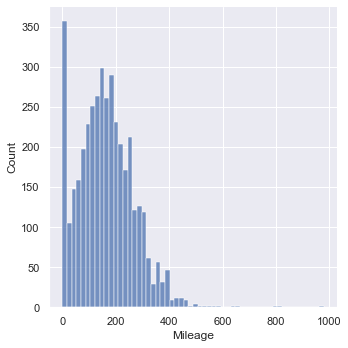

In [11]:
sns.displot(data_no_mv['Mileage']);

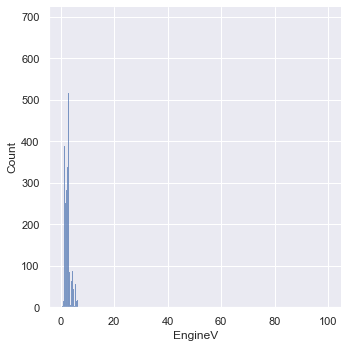

In [12]:
sns.displot(data_no_mv['EngineV']);

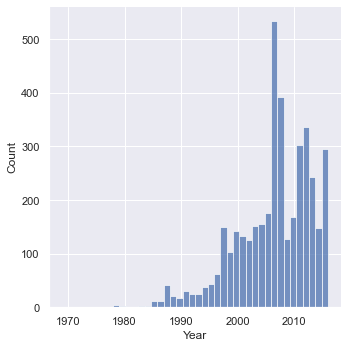

In [13]:
sns.displot(data_no_mv['Year']);

### Dealing with outliers 

One way to deal with outliers is to use quantiles and remove data from the end or beginning

In [14]:
# Price outliers
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


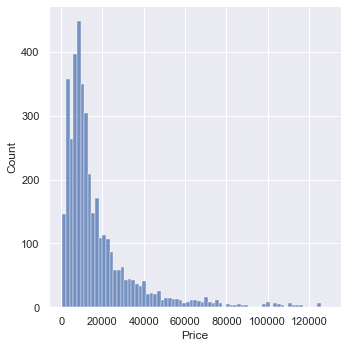

In [15]:
sns.displot(data_1['Price']);

In [16]:
# The data is still skewed but it's better distributed than before

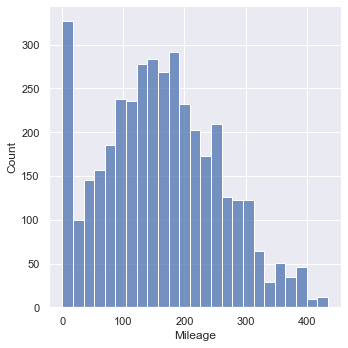

In [17]:
# Mileage outliers
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.displot(data_2['Mileage']);

In [18]:
# EngineV outliers
# Max value for EngineV is 99.99 which is not possible. 
# The biggest engine I found was 8.3l so we can remove every engine with bigger EngineV 

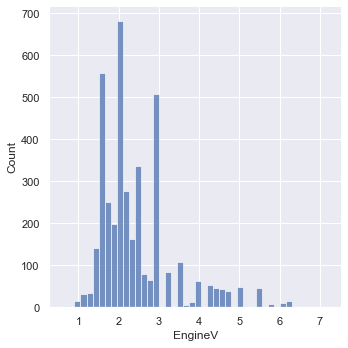

In [19]:
data_3 = data_2[data_2['EngineV']<8.3]
sns.displot(data_3['EngineV']);

In [20]:
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3923,3923.000000,3923,3923.000000,3923.000000,3923,3923,3923.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1501,NaN,NaN,1818,3561,NaN
mean,NaN,17990.899811,NaN,161.269437,2.445743,NaN,NaN,2006.407596
std,NaN,19039.262498,NaN,96.045821,0.951207,NaN,NaN,6.594646
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


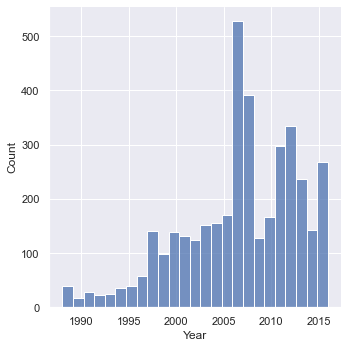

In [21]:
# Year outliers
# In the 'Year' data we will remove 1st percentile of data
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.displot(data_4['Year']);

The final step is to reset indexes of the dataframe to avoid missing indexes (caused by removing part of data while cleaning it)  

In [22]:
data_cleaned = data_4.reset_index(drop=True)

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3869,3869.000000,3869,3869.000000,3869.000000,3869,3869,3869.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1469,NaN,NaN,1807,3507,NaN
mean,NaN,18196.862267,NaN,160.532437,2.452714,NaN,NaN,2006.711295
std,NaN,19083.381768,NaN,95.610571,0.954409,NaN,NaN,6.102717
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking the Ordinary Least Squares assumptions

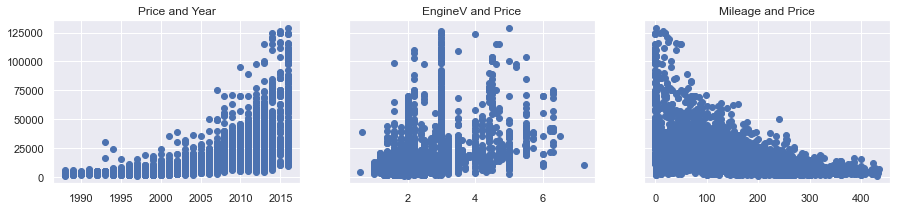

In [24]:
# We can first check the graphs for the linearity for the continuous variables 

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('EngineV and Price')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Mileage and Price')

plt.show()

In [25]:
# We can spot patterns but they are not linear. We have to first transform one or more variables. 
# First we will make log transformation of Price variable

log_price = np.log(data_cleaned['Price'])

# We can add a new column to the table

data_cleaned['Log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


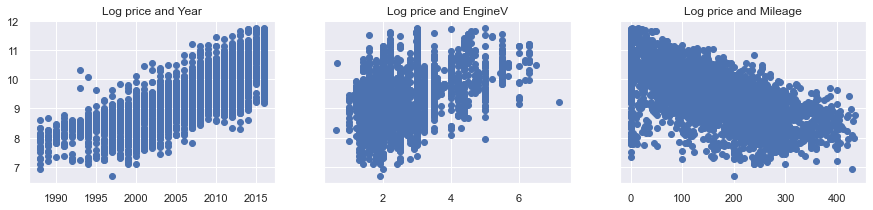

In [26]:
# Now we can plot the graphs again

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Log_price'])
ax1.set_title('Log price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Log_price'])
ax2.set_title('Log price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Log_price'])
ax3.set_title('Log price and Mileage')

plt.show()

Now we can see linear pattern in all of those graphs. We can drop the Price variable.

In [27]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [28]:
# No endogeneity - this assumption is not violated

# Normality and homoscedasticity - not violated also

# No autocorrelation - observations are not time series data or panel data - observations are not dependent on each other.
# Those observations come from different selling platforms with selling offers from different people

In [29]:
# Multicollinearity - let's check that assumption
# We can check for multicolinearity using VIF (variance inflation factor)
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log_price'], dtype=object)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame() 
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [31]:
vif

,VIF,Features
0,3.792512,Mileage
1,7.604155,EngineV
2,10.303342,Year


VIF explanation:

1. VIF = 1: no multicollinearity
2. Values 1 < VIF < 5 are ok

Some sources states that even values up to 6 or 10 are ok.

In here we can see that 'Year' is too correlated with other variables so we will remove 'Year'

In [32]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

### Dummy variables

In [33]:
data_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [ ]:
# We are dropping first because it is perfectly explained by all the others. 
# If every other, for example, brands are 0, it's perfectly clear that this is the one that we dropped.
# If we would leave it like that, without dropping the first one, we would add multicollinearity to the model

In [34]:
data_dummies.head()

,Mileage,EngineV,Log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [36]:
# Rearranging columns
data_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [37]:
col = ['Log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [38]:
data_preprocessed = data_dummies[col]
data_preprocessed.head()

,Log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declaring the inputs and targets

In [39]:
targets = data_preprocessed['Log_price']
inputs = data_preprocessed.drop(['Log_price'], axis=1)

### Data scaling

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [41]:
input_scaled = scaler.transform(inputs)

We scaled here also the dummy variables, which usually shouldn't happen, because they loose all the explanatory power. In here though, it makes no difference for purpose of linear regression.

### Train test split

In [42]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size = 0.2, random_state = 47)

### Creating regression model

In [53]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [54]:
y_hat = model.predict(x_train)

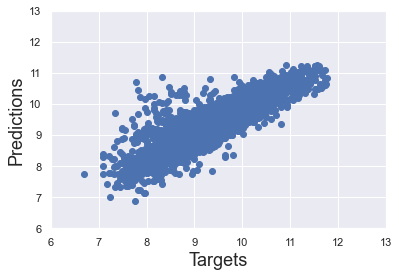

In [55]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets', size = 18)
plt.ylabel('Predictions', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

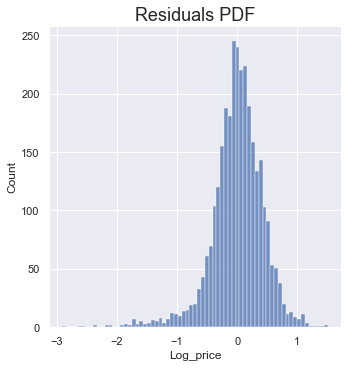

In [56]:
# Residual plot
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18);

In [57]:
# Errors must be normally distributed with the zero mean. Residuals are estimates of errors so they should act the same. 

In [58]:
model.score(x_train, y_train)

0.7467255684179004

### Weights and bias

In [59]:
model.intercept_

9.418285117288995

In [60]:
model.coef_

array([-0.45507725,  0.2120661 ,  0.01931105,  0.0142119 , -0.13868478,
       -0.18313908, -0.05995631, -0.08535936, -0.14298516, -0.09629927,
       -0.19268132, -0.12186758, -0.161343  , -0.12648755, -0.02988849,
       -0.15677765,  0.32140217])

In [61]:
model_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
model_summary['Weights'] = model.coef_
model_summary

,Features,Weights
0,Mileage,-0.455077
1,EngineV,0.212066
2,Brand_BMW,0.019311
3,Brand_Mercedes-Benz,0.014212
4,Brand_Mitsubishi,-0.138685
5,Brand_Renault,-0.183139
6,Brand_Toyota,-0.059956
7,Brand_Volkswagen,-0.085359
8,Body_hatch,-0.142985
9,Body_other,-0.096299


From the table above we can say that:
1. For the continuous variables: 
* if the value is positive it has positive correlation to the predicted variable (for example: bigger the engine bigger the price)
* if the value is negative it has negative correlation to the predicted variable (for example: higher the mileage, lower the price)

2. For the dummies: Every dummy which was dropped is a reference (benchmark) and all the others can be related to that one. For example with brands Audi was dropped. Every other brand with negative value will in general have lower price and every brand with positive value will be in general more expensive. The value of weight shows if it is a big difference or not.

## Testing

In [62]:
y_hat_test = model.predict(x_test)

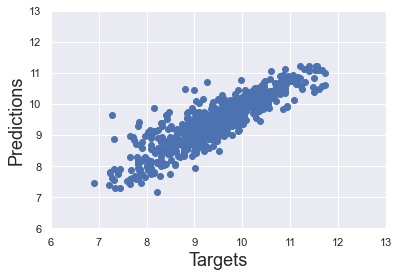

In [63]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets', size = 18)
plt.ylabel('Predictions', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

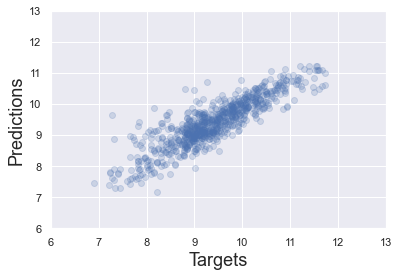

In [66]:
# Using 'alpha' we can get some sort of a heatmap showing concentration of points.
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets', size = 18)
plt.ylabel('Predictions', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [67]:
df_performance = pd.DataFrame(y_hat_test, columns=['Predictions'])
df_performance.head()

,Predictions
0,10.150331
1,10.898697
2,10.503592
3,9.634764
4,10.763585


Those are log values, we have to switch it to actual prices using the opposite of log which is exp

In [70]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_performance.head()

,Predictions
0,25599.572882
1,54105.839669
2,36446.167011
3,15287.085813
4,47267.797976


In [73]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Predictions,Target
0,25599.572882,NaN
1,54105.839669,NaN
2,36446.167011,13300.0
3,15287.085813,NaN
4,47267.797976,NaN
...,...,...
769,13797.288455,NaN
770,9738.672216,NaN
771,5386.021828,NaN
772,30917.303321,NaN


In [74]:
y_test

3487     9.823153
3728    10.950807
3722    10.357743
2940     9.159047
3793    10.915088
          ...    
3135     9.814656
2622     9.350015
1136     7.901007
1569    10.064756
282      8.980927
Name: Log_price, Length: 774, dtype: float64

The reason that we have NaN values is that we have original indexes from the df before the split. We have to drop those indexes because when we added y_test to df_performance, pandas is trying to match those indexes.

In [76]:
y_test = y_test.reset_index(drop=True)
y_test

0       9.823153
1      10.950807
2      10.357743
3       9.159047
4      10.915088
         ...    
769     9.814656
770     9.350015
771     7.901007
772    10.064756
773     8.980927
Name: Log_price, Length: 774, dtype: float64

In [77]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Predictions,Target
0,25599.572882,18456.16
1,54105.839669,57000.00
2,36446.167011,31500.00
3,15287.085813,9500.00
4,47267.797976,55000.00
...,...,...
769,13797.288455,18300.00
770,9738.672216,11499.00
771,5386.021828,2700.00
772,30917.303321,23500.00


In [79]:
# We can create another column with residuals

df_performance['Residual'] = df_performance['Target'] - df_performance['Predictions']

In [80]:
# We will also create difference in %
df_performance['Difference%'] = np.absolute(df_performance['Residual']/df_performance['Target']*100)

In [81]:
df_performance

,Predictions,Target,Residual,Difference%
0,25599.572882,18456.16,-7143.412882,38.704762
1,54105.839669,57000.00,2894.160331,5.077474
2,36446.167011,31500.00,-4946.167011,15.702117
3,15287.085813,9500.00,-5787.085813,60.916693
4,47267.797976,55000.00,7732.202024,14.058549
...,...,...,...,...
769,13797.288455,18300.00,4502.711545,24.604981
770,9738.672216,11499.00,1760.327784,15.308529
771,5386.021828,2700.00,-2686.021828,99.482290
772,30917.303321,23500.00,-7417.303321,31.562993


In [82]:
df_performance.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15988.372154,17684.772455,1696.400301,36.589604
std,12844.018754,18848.710933,10175.657050,58.966472
min,1295.113391,999.000000,-34681.012967,0.030669
25%,7709.351602,7112.500000,-2336.440078,11.576849
50%,11796.404853,11200.000000,167.214144,22.777009
75%,20161.893014,21000.000000,3299.858651,39.544862
max,74935.359734,125000.000000,83733.131293,953.172406


In [85]:
# We have to manually examin the df to check the reason of such big max differences (although most of them are pretty descent)
# To see everything we have to also add some display options
pd.options.display.max_rows = 999

# .. and also get the differences with only to digits for the better look
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_performance.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
41,7987.55,7990.00,2.45,0.03
432,21346.37,21335.00,-11.37,0.05
460,16480.47,16500.00,19.53,0.12
563,29535.79,29500.00,-35.79,0.12
27,10770.04,10800.00,29.96,0.28
196,8330.13,8300.00,-30.13,0.36
389,11569.30,11500.00,-69.30,0.60
755,24349.73,24500.00,150.27,0.61
285,12982.45,12900.00,-82.45,0.64
324,9436.77,9500.00,63.23,0.67


All the residuals for the last rows (highest differences in prediction) are negative. That means that we predicted much higher price than we should. 

We have to think what is missing and what could cause such situation. Maybe there are some broken cars and even though the year, mileage, brand is right for the price, the damage causes the price reduction.

### What's next ?

The next step is improving the model which can be done different ways:
1. Different set of variables
2. Removing more outliers
3. Different transformation

... and so on ...

### Some suggestions:

- performing feature selection
- creating regression where 'Price' is not transformed
- take care of outliers different way